In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load data from the single CSV file
data = pd.read_csv('data/twitter.csv')
data.head()


,Id,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,10091,It's the everything else that's complicated. #...,0,11500,NaN,0,Chicago,NotSpam,NaN,NaN,NaN,NaN
1,10172,Eren sent a glare towards Mikasa then nodded a...,0,0,NaN,0,NaN,NotSpam,NaN,NaN,NaN,NaN
2,7012,I posted a new photo to Facebook http://fb.me/...,0,0,NaN,0,"Scotland, U.K",NotSpam,NaN,NaN,NaN,NaN
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319,611,294,0,"Atlanta, Ga",Spam,NaN,NaN,NaN,NaN
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840,1724,1522,0,Blumberg,Spam,NaN,NaN,NaN,NaN


In [2]:
data.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,10091,It's the everything else that's complicated. #...,0,11500,NaN,0,Chicago,NotSpam,NaN,NaN,NaN,NaN
1,10172,Eren sent a glare towards Mikasa then nodded a...,0,0,NaN,0,NaN,NotSpam,NaN,NaN,NaN,NaN
2,7012,I posted a new photo to Facebook http://fb.me/...,0,0,NaN,0,"Scotland, U.K",NotSpam,NaN,NaN,NaN,NaN
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319,611,294,0,"Atlanta, Ga",Spam,NaN,NaN,NaN,NaN
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840,1724,1522,0,Blumberg,Spam,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11968 non-null  int64 
 1   Tweet        11968 non-null  object
 2   following    11826 non-null  object
 3   followers    11949 non-null  object
 4   actions      9206 non-null   object
 5   is_retweet   11958 non-null  object
 6   location     10324 non-null  object
 7   Type         11958 non-null  object
 8   Unnamed: 8   178 non-null    object
 9   Unnamed: 9   19 non-null     object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [4]:
# Preprocessing: Filter columns and clean data as needed
# Filter the dataset to include only 'Spam' and 'NotSpam' classes
data = data[data['Type'].isin(['Spam', 'NotSpam'])]
data = data[['Tweet', 'Type']].dropna()

data

,Tweet,Type
0,It's the everything else that's complicated. #...,NotSpam
1,Eren sent a glare towards Mikasa then nodded a...,NotSpam
2,I posted a new photo to Facebook http://fb.me/...,NotSpam
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,Spam
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,Spam
...,...,...
11963,11:11 meet harry,NotSpam
11964,If BBC Food disappears the loss of knowledge w...,NotSpam
11965,Look What Liberals Did to This Historic Monume...,Spam
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",NotSpam


In [5]:
# Create a TF-IDF vectorizer
vectorizer = joblib.load('twitterTfidfVectorizer.sav')
X = vectorizer.fit_transform(data['Tweet'].values)
y = data['Type'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class Distribution in Training Data:
 NotSpam    4904
Spam       4526
Name: count, dtype: int64
Model Accuracy: 0.916030534351145
Classification Report:
               precision    recall  f1-score   support

     NotSpam       0.90      0.95      0.92      1214
        Spam       0.94      0.88      0.91      1144

    accuracy                           0.92      2358
   macro avg       0.92      0.92      0.92      2358
weighted avg       0.92      0.92      0.92      2358

Classification Report (Imbalanced-learn):
                    pre       rec       spe        f1       geo       iba       sup

    NotSpam       0.90      0.95      0.88      0.92      0.91      0.84      1214
       Spam       0.94      0.88      0.95      0.91      0.91      0.83      1144

avg / total       0.92      0.92      0.91      0.92      0.91      0.84      2358



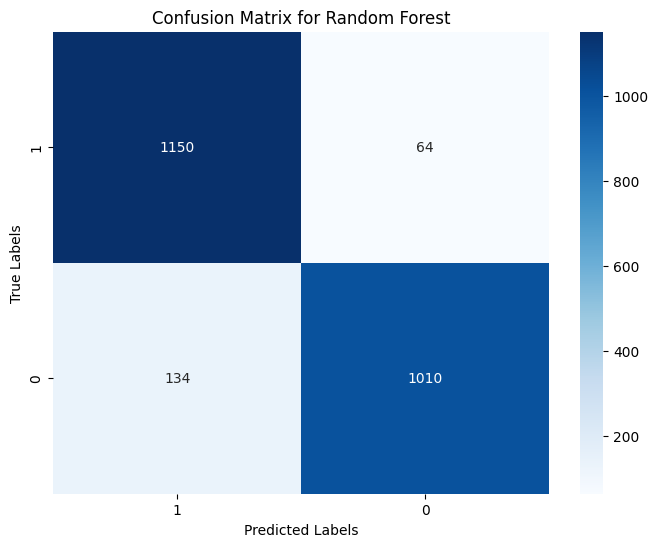

NameError: name 'random_forest' is not defined

In [10]:

from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

# Check class distribution in the training data
class_distribution = pd.Series(y_train).value_counts()
print("Class Distribution in Training Data:\n", class_distribution)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Oversample the minority class using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Train the classifier on the oversampled data
rf_classifier.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Optionally, you can also use imbalanced-learn's classification report
classification_rep_imbalanced = classification_report_imbalanced(y_test, y_pred)
print("Classification Report (Imbalanced-learn):\n", classification_rep_imbalanced)


# Plot confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


SVM Classifier:
Accuracy: 0.9164546225614928
Precision: 0.9206229965390703
Recall: 0.9150578622366101
F1 Score: 0.9159919118031359


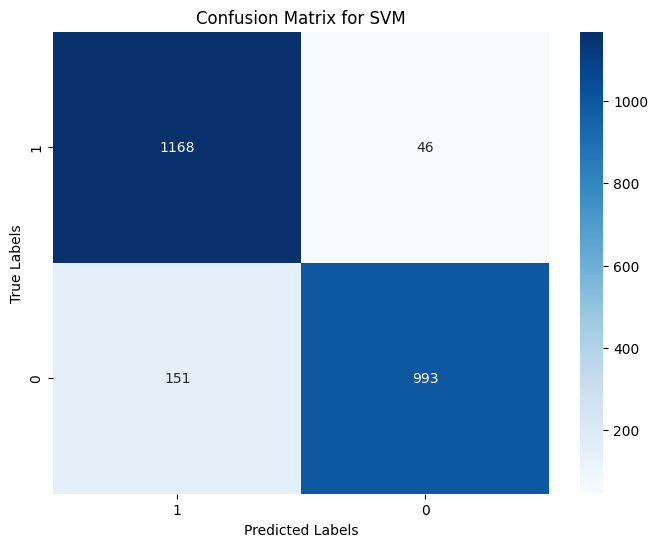

['SVCClassifier_model.sav']

In [7]:

# Define the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions with SVM
svm_predictions = svm.predict(X_test)
# Calculate evaluation metrics for SVM with 'macro' average setting
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='macro', zero_division='warn')
svm_recall = recall_score(y_test, svm_predictions, average='macro', zero_division='warn')
svm_f1 = f1_score(y_test, svm_predictions, average='macro', zero_division='warn')

# Print results for SVM
print("SVM Classifier:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")

# Plot confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

# Save the trained SVM classifier
joblib.dump(svm, 'SVCClassifier_model.sav')



In [8]:

# Define the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions with Naive Bayes
nb_predictions = naive_bayes.predict(X_test)
# Calculate evaluation metrics for Naive Bayes with 'macro' average setting
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro', zero_division='warn')
nb_recall = recall_score(y_test, nb_predictions, average='macro', zero_division='warn')
nb_f1 = f1_score(y_test, nb_predictions, average='macro', zero_division='warn')

# Print results for Naive Bayes
print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")

# Save the trained Naive Bayes classifier
joblib.dump(naive_bayes, 'MultinomialNB_model.sav')




Naive Bayes Classifier:
Accuracy: 0.8965224766751484
Precision: 0.8998091603053435
Recall: 0.8952215412264836
F1 Score: 0.8960070910500075


['MultinomialNB_model.sav']